In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Evolution of A in the F4 run

In [2]:
import utils
from ppm import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

prof = yprofile('/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4')

cb = utils.colourblind

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0


In [3]:
tau = np.array([807., 1399., 2119., 2351., 2695.])
markers = ['v', '^', '<', '>', 'o', 's']
colours = [5, 3, 9, 8, 1, 6]

## Evolution of A in the convection zone

<IPython.core.display.Javascript object>


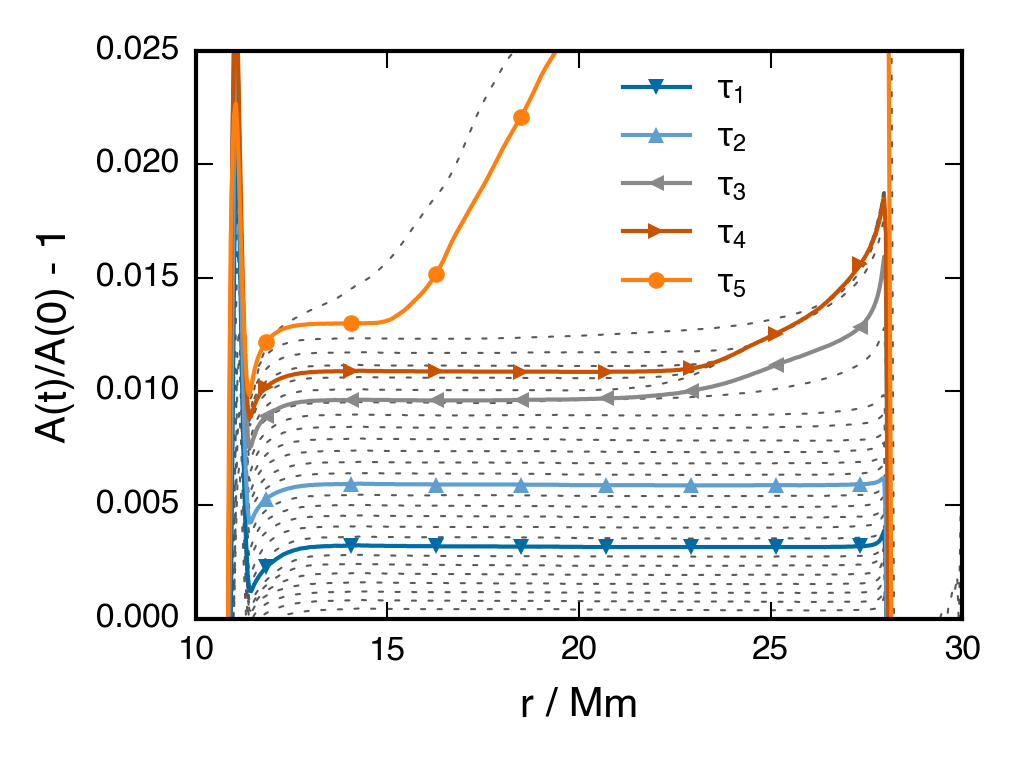

The closest time is at Ndump = 559
You wanted tau = 807.0 min. yprofile.get() found the closest dump at t = 807.8 min.

The closest time is at Ndump = 970
You wanted tau = 1399.0 min. yprofile.get() found the closest dump at t = 1400.7 min.

The closest time is at Ndump = 1469
You wanted tau = 2119.0 min. yprofile.get() found the closest dump at t = 2120.4 min.

The closest time is at Ndump = 1630
You wanted tau = 2351.0 min. yprofile.get() found the closest dump at t = 2352.7 min.

The closest time is at Ndump = 1908
You wanted tau = 2695.0 min. yprofile.get() found the closest dump at t = 2695.5 min.



In [7]:
r = prof.get('Y', fname = 0, resolution = 'l')
A0 = prof.get('A', fname = 0., numtype = 'time', resolution = 'l', silent = True)

ifig = 1; plt.close(ifig); plt.figure(ifig)
for i in range(28):
    t = prof.get('t', fname = 60.*100.*i, numtype = 'time', resolution = 'l', silent = True)[-1]
    A = prof.get('A', fname = 60.*100.*i, numtype = 'time', resolution = 'l', silent = True)
    plt.plot(r, A/A0 - 1., ':', lw = 0.5, color = cb(4))
for i in range(len(tau)):
    t = prof.get('t', fname = 60.*tau[i], numtype = 'time', resolution = 'l', silent = False)[-1]
    A = prof.get('A', fname = 60.*tau[i], numtype = 'time', resolution = 'l', silent = True)
    plt.plot(r, A/A0 - 1., '-', marker = markers[i], color = cb(colours[i]), \
             markevery = 50, label = r'$\tau_{{{:d}}}$'.format(i+1))
    
    print 'You wanted tau = {:.1f} min. yprofile.get() found the closest dump at t = {:.1f} min.\n'.\
          format(tau[i], t/60.)
    
plt.legend(loc = (0.54, 0.54))
plt.xlim((10., 30.))
plt.ylim((0., 2.5e-2))
plt.xlabel('r / Mm')
plt.ylabel('A(t)/A(0) - 1')
plt.tight_layout()
plt.savefig('A_evolution_cz_F4.pdf')